<a href="https://colab.research.google.com/github/raysha-farjana/Basic-Programming-with-Python-BPP-3-/blob/main/Personal_Finance_Analyzer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import csv

# Path to the uploaded file
file_path = '/content/finance_data(1).csv'

# Initialize a list to hold the data
finance_data = {"income": [], "expense": []}

# Open and read the CSV file
with open(file_path, mode='r') as file:
    reader = csv.DictReader(file)

    # Process each row in the CSV file
    for row in reader:
        entry_type = row["Type"].lower()

        # Check if the entry is income or expense and store it accordingly
        if entry_type == "income":
            finance_data["income"].append({
                "Date": row["Date"],
                "Source": row["Source/Category"],
                "Amount": float(row["Amount"])
            })
        elif entry_type == "expense":
            finance_data["expense"].append({
                "Date": row["Date"],
                "Category": row["Source/Category"],
                "Amount": float(row["Amount"])
            })

# Display the imported data
print("Income Data:", finance_data["income"])
print("Expense Data:", finance_data["expense"])

Income Data: [{'Date': '2025-01-20', 'Source': 'Salary', 'Amount': 2500.0}, {'Date': '2025-01-22', 'Source': 'Freelancing', 'Amount': 800.0}, {'Date': '2025-01-23', 'Source': 'Investments', 'Amount': 500.0}]
Expense Data: [{'Date': '2025-01-24', 'Category': 'Food', 'Amount': 200.0}, {'Date': '2025-01-25', 'Category': 'Transport', 'Amount': 50.0}, {'Date': '2025-01-26', 'Category': 'Utilities', 'Amount': 100.0}, {'Date': '2025-01-27', 'Category': 'Entertainment', 'Amount': 75.0}]


In [5]:
# Calculate Total Income, Total Expenses, Net Savings, and Category-wise Expense Breakdown
def generate_financial_insights(finance_data):
    # Total Income
    total_income = sum(entry['Amount'] for entry in finance_data['income'])

    # Total Expenses
    total_expenses = sum(entry['Amount'] for entry in finance_data['expense'])

    # Net Savings (Income - Expenses)
    net_savings = total_income - total_expenses

    # Category-wise Expense Breakdown
    category_expenses = {}
    for entry in finance_data['expense']:
        category = entry['Category']
        if category not in category_expenses:
            category_expenses[category] = 0
        category_expenses[category] += entry['Amount']

    # Calculate percentage of total expenses for each category
    category_percentages = {category: (amount / total_expenses) * 100 for category, amount in category_expenses.items()}

    # results
    print("Financial Summary:")
    print(f"Total Income: ${total_income:.2f}")
    print(f"Total Expenses: ${total_expenses:.2f}")
    print(f"Net Savings: ${net_savings:.2f}")
    print("\nCategory-wise Expense Breakdown:")
    for category, percentage in category_percentages.items():
        print(f"{category}: {percentage:.2f}% of total expenses")

generate_financial_insights(finance_data)

Financial Summary:
Total Income: $3800.00
Total Expenses: $425.00
Net Savings: $3375.00

Category-wise Expense Breakdown:
Food: 47.06% of total expenses
Transport: 11.76% of total expenses
Utilities: 23.53% of total expenses
Entertainment: 17.65% of total expenses


In [6]:
# Predefined spending limits
category_budgets = {
    "Food": 300.00,
    "Transport": 100.00,
    "Utilities": 150.00,
    "Entertainment": 200.00
}

# Function to track budget and notify user when exceeding limits
def budget_planning(finance_data, category_budgets):
    # Calculate total spending per category
    category_spending = {}
    for entry in finance_data["expense"]:
        category = entry["Category"]
        if category not in category_spending:
            category_spending[category] = 0
        category_spending[category] += entry["Amount"]

    # Compare spending with budget and notify if exceeded
    for category, budget in category_budgets.items():
        actual_spending = category_spending.get(category, 0)
        if actual_spending > budget:
            print(f"Warning: You have exceeded your budget for {category}!")
            print(f"  Budget: ${budget:.2f}, Actual: ${actual_spending:.2f}")
        else:
            print(f"{category} is within budget.")
            print(f"  Budget: ${budget:.2f}, Actual: ${actual_spending:.2f}")

budget_planning(finance_data, category_budgets)

Food is within budget.
  Budget: $300.00, Actual: $200.00
Transport is within budget.
  Budget: $100.00, Actual: $50.00
Utilities is within budget.
  Budget: $150.00, Actual: $100.00
Entertainment is within budget.
  Budget: $200.00, Actual: $75.00


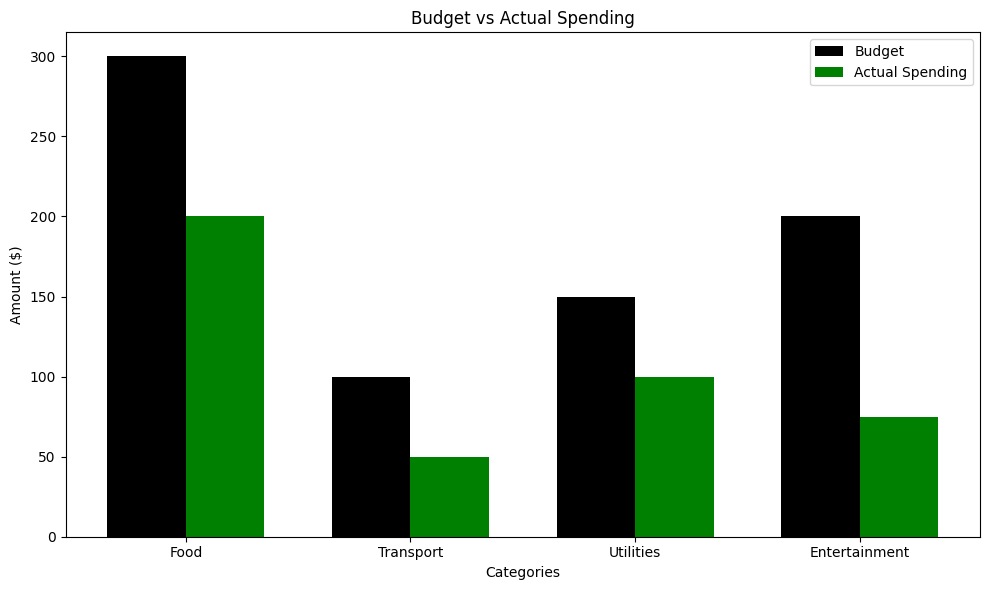

In [7]:
import matplotlib.pyplot as plt

# Predefined spending limits
category_budgets = {
    "Food": 300.00,
    "Transport": 100.00,
    "Utilities": 150.00,
    "Entertainment": 200.00
}

# Calculate total spending per category from finance_data
category_spending = {
    "Food": 200.00,
    "Transport": 50.00,
    "Utilities": 100.00,
    "Entertainment": 75.00
}

# Create lists for categories, budgets, and actual spending
categories = list(category_budgets.keys())
budgets = list(category_budgets.values())
actual_spending = [category_spending.get(category, 0) for category in categories]

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(categories))

# Plot the bars for Budget and Actual Spending
bar1 = ax.bar(index, budgets, bar_width, label='Budget', color='black')
bar2 = ax.bar([i + bar_width for i in index], actual_spending, bar_width, label='Actual Spending', color='green')

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Amount ($)')
ax.set_title('Budget vs Actual Spending')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

In [8]:
from datetime import datetime

# Savings Goal Information
savings_goal = {
    "Goal Amount": 5000.00,         # The target savings amount
    "Deadline": datetime(2025, 12, 31),  # The target date for savings goal
    "Current Savings": 1500.00       # The current amount saved
}

# Function to track savings progress and provide motivational messages
def track_savings_progress(savings_goal):
    # Calculate the remaining amount to save
    remaining_savings = savings_goal["Goal Amount"] - savings_goal["Current Savings"]

    # Calculate time remaining
    time_remaining = savings_goal["Deadline"] - datetime.now()

    # Provide a motivational message based on progress
    if remaining_savings <= 0:
        print(f"Congratulations! You've reached your savings goal of ${savings_goal['Goal Amount']:.2f}.")
    else:
        print(f"You're making progress! You still need to save ${remaining_savings:.2f} to reach your goal of ${savings_goal['Goal Amount']:.2f}.")

    # Time left in days
    if time_remaining.days > 0:
        print(f"Time remaining: {time_remaining.days} days to achieve your goal!")
    else:
        print(f"The deadline has passed! Don't worry, keep saving for next time!")

track_savings_progress(savings_goal)

You're making progress! You still need to save $3500.00 to reach your goal of $5000.00.
Time remaining: 340 days to achieve your goal!


In [9]:
import json

# data for finance tracking
finance_data = {
    "income": [
        {"Date": "2025-01-20", "Source": "Salary", "Amount": 2500.00},
        {"Date": "2025-01-22", "Source": "Freelancing", "Amount": 800.00},
        {"Date": "2025-01-23", "Source": "Investments", "Amount": 500.00},
    ],
    "expense": [
        {"Date": "2025-01-24", "Category": "Food", "Amount": 200.00},
        {"Date": "2025-01-25", "Category": "Transport", "Amount": 50.00},
        {"Date": "2025-01-26", "Category": "Utilities", "Amount": 100.00},
        {"Date": "2025-01-27", "Category": "Entertainment", "Amount": 75.00},
    ]
}

category_budgets = {
    "Food": 300.00,
    "Transport": 100.00,
    "Utilities": 150.00,
    "Entertainment": 200.00
}

savings_goal = {
    "Goal Amount": 5000.00,
    "Deadline": "2025-12-31",
    "Current Savings": 1500.00
}

# Functions for each menu option
def add_income_or_expense():
    print("Enter '1' to add income or '2' to add expense:")
    choice = input()
    if choice == '1':  # Add income
        source = input("Enter source of income (e.g., Salary, Freelancing): ")
        amount = float(input("Enter amount: "))
        date = input("Enter date (YYYY-MM-DD): ")
        finance_data["income"].append({"Date": date, "Source": source, "Amount": amount})
        print("Income added successfully.")
    elif choice == '2':  # Add expense
        category = input("Enter expense category (e.g., Food, Transport): ")
        amount = float(input("Enter amount: "))
        date = input("Enter date (YYYY-MM-DD): ")
        finance_data["expense"].append({"Date": date, "Category": category, "Amount": amount})
        print("Expense added successfully.")

def view_summaries_and_insights():
    print("\nGenerating financial insights...\n")
    generate_financial_insights(finance_data)

def update_budget_limits_and_savings_goals():
    print("\nUpdate budget limits and savings goals:")

    # Update budget limits
    print("Current budget limits:")
    for category, limit in category_budgets.items():
        print(f"{category}: ${limit:.2f}")
    print("Enter the category to update the budget limit (or type 'done' to finish):")
    category_to_update = input()
    while category_to_update != 'done':
        if category_to_update in category_budgets:
            new_limit = float(input(f"Enter new budget limit for {category_to_update}: "))
            category_budgets[category_to_update] = new_limit
            print(f"{category_to_update} budget updated to ${new_limit:.2f}")
        else:
            print(f"Category {category_to_update} not found.")
        print("Enter another category or 'done' to finish:")
        category_to_update = input()

    # Update savings goals
    print("Current savings goal:")
    print(f"Goal Amount: ${savings_goal['Goal Amount']:.2f}, Current Savings: ${savings_goal['Current Savings']:.2f}, Deadline: {savings_goal['Deadline']}")
    print("Would you like to update the savings goal? (yes/no):")
    if input().lower() == 'yes':
        savings_goal["Goal Amount"] = float(input("Enter new savings goal amount: "))
        savings_goal["Deadline"] = input("Enter new deadline (YYYY-MM-DD): ")
        savings_goal["Current Savings"] = float(input("Enter current savings amount: "))
        print("Savings goal updated successfully.")

# Menu system
def menu():
    while True:
        print("\n--- Personal Finance Analyzer ---")
        print("1. Add Income or Expense")
        print("2. View Summaries and Insights")
        print("3. Update Budget Limits and Savings Goals")
        print("4. Exit")

        choice = input("Select an option: ")

        if choice == '1':
            add_income_or_expense()
        elif choice == '2':
            view_summaries_and_insights()
        elif choice == '3':
            update_budget_limits_and_savings_goals()
        elif choice == '4':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

menu()


--- Personal Finance Analyzer ---
1. Add Income or Expense
2. View Summaries and Insights
3. Update Budget Limits and Savings Goals
4. Exit
Select an option: 4
Exiting the program. Goodbye!
